In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import klib

In [ ]:
train = pd.read_csv('training_set_features.csv')
test = pd.read_csv('test_set_features.csv')
trains_label = pd.read_csv('training_set_labels.csv')

# Describing the Data

In [ ]:
train.head(15)

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0               0           1.0             0.0                        0.0   
1               1           3.0             2.0                        0.0   
2               2           1.0             1.0                        0.0   
3               3           1.0             1.0                        0.0   
4               4           2.0             1.0                        0.0   
5               5           3.0             1.0                        0.0   
6               6           0.0             0.0                        0.0   
7               7           1.0             0.0                        0.0   
8               8           0.0             2.0                        0.0   
9               9           2.0             1.0                        0.0   
10             10           2.0             1.0                        0.0   
11             11           1.0             2.0                        0.0   
12             12           1.0             1.0                        0.0   
13             13           1.0             1.0                        0.0   
14             14           3.0             1.0                        0.0   

    behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                    0.0                   0.0                    0.0   
1                    1.0                   0.0                    1.0   
2                    1.0                   0.0                    0.0   
3                    1.0                   0.0                    1.0   
4                    1.0                   0.0                    1.0   
5                    1.0                   0.0                    1.0   
6                    0.0                   0.0                    0.0   
7                    1.0                   0.0                    1.0   
8                    1.0                   0.0                    1.0   
9                    1.0                   0.0                    0.0   
10                   1.0                   0.0                    1.0   
11                   1.0                   0.0                    1.0   
12                   1.0                   0.0                    1.0   
13                   1.0                   0.0                    1.0   
14                   1.0                   0.0                    1.0   

    behavioral_large_gatherings  behavioral_outside_home  \
0                           0.0                      1.0   
1                           0.0                      1.0   
2                           0.0                      0.0   
3                           1.0                      0.0   
4                           1.0                      0.0   
5                           0.0                      0.0   
6                           0.0                      0.0   
7                           0.0                      0.0   
8                           1.0                      1.0   
9                           1.0                      0.0   
10                          1.0                      0.0   
11                          0.0                      0.0   
12                          1.0                      0.0   
13                          0.0                      0.0   
14                          0.0                      1.0   

    behavioral_touch_face  ...             income_poverty  marital_status  \
0                     1.0  ...              Below Poverty     Not Married   
1                     1.0  ...              Below Poverty     Not Married   
2                     0.0  ...  <= $75,000, Above Poverty     Not Married   
3                     0.0  ...              Below Poverty     Not Married   
4                     1.0  ...  <= $75,000, Above Poverty         Married   
5                     1.0  ...  <= $75,000, Above Poverty         Married   
6                     0.0  ...  <= $75,000, Above Poverty     Not Married   
7        

In [ ]:
train = train.drop(columns=['employment_industry', 'employment_occupation'])
test = test.drop(columns=['employment_industry', 'employment_occupation'])

In [ ]:
print(train.shape)
print(test.shape)

(26707, 34)
(26708, 34)


In [ ]:
print(trains_label.shape)

(26707, 3)


In [ ]:
trains_label.head(10)

respondent_id  h1n1_vaccine  seasonal_vaccine
0              0             0                 0
1              1             0                 1
2              2             0                 0
3              3             0                 1
4              4             0                 0
5              5             0                 0
6              6             0                 0
7              7             1                 1
8              8             0                 0
9              9             0                 0

In [ ]:
trains_label.describe()

respondent_id  h1n1_vaccine  seasonal_vaccine
count   26707.000000  26707.000000      26707.000000
mean    13353.000000      0.212454          0.465608
std      7709.791156      0.409052          0.498825
min         0.000000      0.000000          0.000000
25%      6676.500000      0.000000          0.000000
50%     13353.000000      0.000000          0.000000
75%     20029.500000      0.000000          1.000000
max     26706.000000      1.000000          1.000000

In [ ]:
count_vaccines = trains_label.eq(1).sum()
print(count)

respondent_id           1
h1n1_vaccine         5674
seasonal_vaccine    12435
dtype: int64


In [ ]:
no_vaccine = ((trains_label['h1n1_vaccine'] == 0) & (trains_label['seasonal_vaccine'] == 0)).sum()
print(no_vaccine) 

13295


In [ ]:
test.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')

In [ ]:
train.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children'],
      dtype='object')

In [ ]:
train.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [ ]:
test.dtypes

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [ ]:
train.describe()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26707.000000  26615.000000    26591.000000               26636.000000   
mean    13353.000000      1.618486        1.262532                   0.048844   
std      7709.791156      0.910311        0.618149                   0.215545   
min         0.000000      0.000000        0.000000                   0.000000   
25%      6676.500000      1.000000        1.000000                   0.000000   
50%     13353.000000      2.000000        1.000000                   0.000000   
75%     20029.500000      2.000000        2.000000                   0.000000   
max     26706.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26499.000000          26688.000000           26665.000000   
mean               0.725612              0.068982               0.825614   
std                0.446214              0.253429               0.379448   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                  26620.00000             26625.000000   
mean                       0.35864                 0.337315   
std                        0.47961                 0.472802   
min                        0.00000                 0.000000   
25%                        0.00000                 0.000000   
50%                        0.00000                 0.000000   
75%                        1.00000                 1.000000   
max                        1.00000                 1.000000   

       behavioral_touch_face  ...  health_worker  health_insurance  \
count           26579.000000  ...   25903.000000       14433.00000   
mean                0.677264  ...       0.111918           0.87972   
std                 0.467531  ...       0.315271           0.32530   
min                 0.000000  ...       0.000000           0.00000   
25%                 0.000000  ...       0.000000           1.00000   
50%                 1.000000  ...       0.000000           1.00000   
75%                 1.000000  ...       0.000000           1.00000   
max                 1.000000  ...       1.000000           1.00000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26316.000000       26319.000000   
mean                      3.850623           2.342566   
std                       1.007436           1.285539   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26312.000000                 26245.000000   
mean                      2.357670                     4.025986   
std                       1.362766                     1.086565   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26193.000000                 26170.000000      26458.000000   
mean            2.719162                     2.118112          0.886499   
std             1.385055                     1.332

In [ ]:
test.describe()

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
count   26708.000000  26623.000000    26586.000000               26629.000000   
mean    40060.500000      1.623145        1.266042                   0.049645   
std      7710.079831      0.902755        0.615617                   0.217215   
min     26707.000000      0.000000        0.000000                   0.000000   
25%     33383.750000      1.000000        1.000000                   0.000000   
50%     40060.500000      2.000000        1.000000                   0.000000   
75%     46737.250000      2.000000        2.000000                   0.000000   
max     53414.000000      3.000000        2.000000                   1.000000   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
count          26495.000000          26689.000000           26668.000000   
mean               0.729798              0.069279               0.826084   
std                0.444072              0.253934               0.379045   
min                0.000000              0.000000               0.000000   
25%                0.000000              0.000000               1.000000   
50%                1.000000              0.000000               1.000000   
75%                1.000000              0.000000               1.000000   
max                1.000000              1.000000               1.000000   

       behavioral_large_gatherings  behavioral_outside_home  \
count                 26636.000000             26626.000000   
mean                      0.351517                 0.337227   
std                       0.477453                 0.472772   
min                       0.000000                 0.000000   
25%                       0.000000                 0.000000   
50%                       0.000000                 0.000000   
75%                       1.000000                 1.000000   
max                       1.000000                 1.000000   

       behavioral_touch_face  ...  health_worker  health_insurance  \
count           26580.000000  ...   25919.000000      14480.000000   
mean                0.683747  ...       0.111501          0.887914   
std                 0.465022  ...       0.314758          0.315483   
min                 0.000000  ...       0.000000          0.000000   
25%                 0.000000  ...       0.000000          1.000000   
50%                 1.000000  ...       0.000000          1.000000   
75%                 1.000000  ...       0.000000          1.000000   
max                 1.000000  ...       1.000000          1.000000   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
count                 26310.000000       26328.000000   
mean                      3.844622           2.326838   
std                       1.007570           1.275636   
min                       1.000000           1.000000   
25%                       3.000000           1.000000   
50%                       4.000000           2.000000   
75%                       5.000000           4.000000   
max                       5.000000           5.000000   

       opinion_h1n1_sick_from_vacc  opinion_seas_vacc_effective  \
count                 26333.000000                 26256.000000   
mean                      2.360612                     4.024832   
std                       1.359413                     1.083204   
min                       1.000000                     1.000000   
25%                       1.000000                     4.000000   
50%                       2.000000                     4.000000   
75%                       4.000000                     5.000000   
max                       5.000000                     5.000000   

       opinion_seas_risk  opinion_seas_sick_from_vacc  household_adults  \
count       26209.000000                 26187.000000      26483.000000   
mean            2.708688                     2.143392          0.894310   
std             1.376045                     1.339

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

https://github.com/patiegm/Datasci_Resources/blob/master/CRISP-DM%20Analysis%20Template.ipynb

# Data quality

In [ ]:
train.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:
test.isnull().sum()

respondent_id                      0
h1n1_concern                      85
h1n1_knowledge                   122
behavioral_antiviral_meds         79
behavioral_avoidance             213
behavioral_face_mask              19
behavioral_wash_hands             40
behavioral_large_gatherings       72
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            932
child_under_6_months             813
health_worker                    789
health_insurance               12228
opinion_h1n1_vacc_effective      398
opinion_h1n1_risk                380
opinion_h1n1_sick_from_vacc      375
opinion_seas_vacc_effective      452
opinion_seas_risk                499
opinion_seas_sick_from_vacc      521
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4497
m

GridSpec(6, 10)

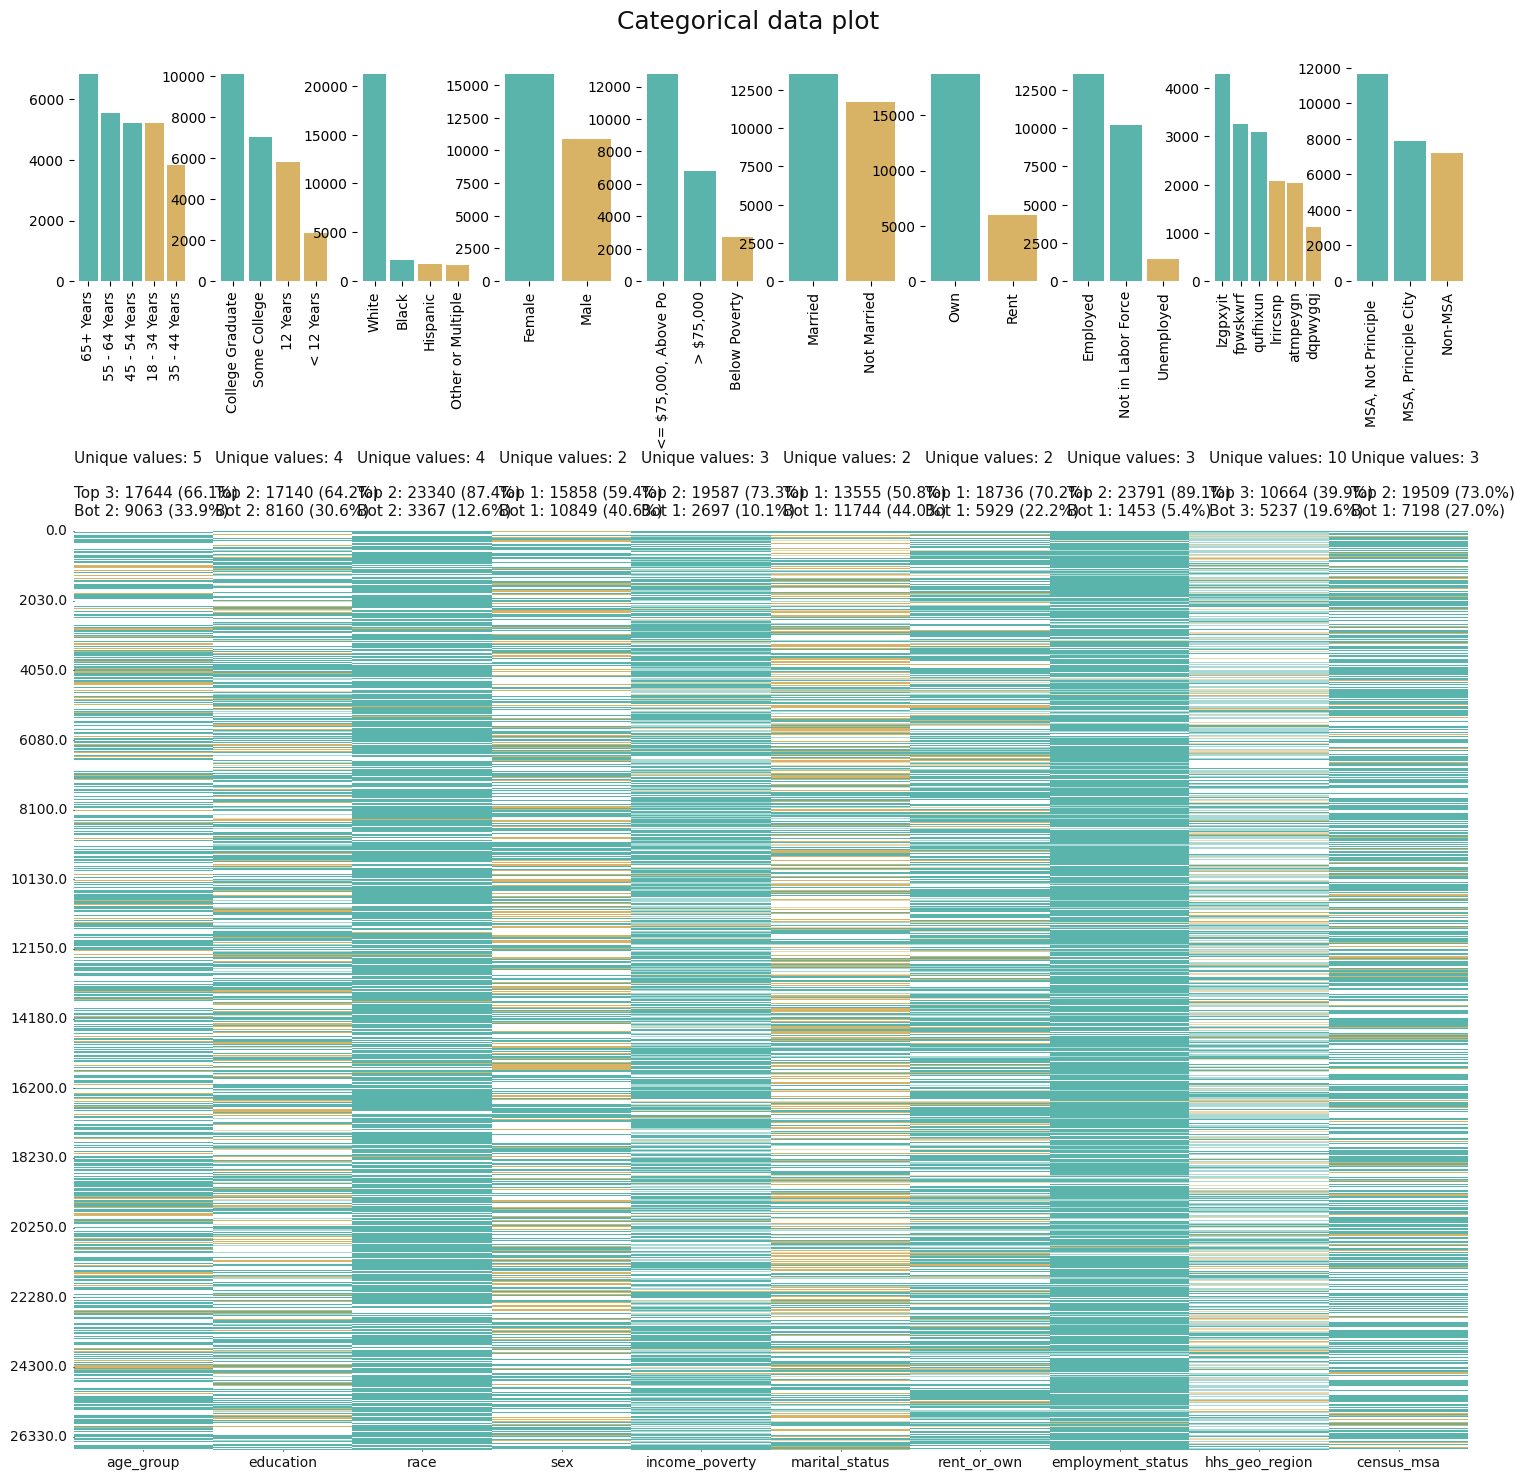

In [ ]:
klib.cat_plot(train, top=3, bottom=3)

In [ ]:
def display_categories(train, categories):
    for category in categories:
        if category in train.columns:
            unique_values = train[category].unique()
            print(f"unique values in {category}: {unique_values}")
        else:
            print(f"Category '{category}' not found in data")

categories = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status' , 'hhs_geo_region' , 'census_msa']    

display_categories(train, categories)

unique values in age_group: ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
unique values in education: ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
unique values in race: ['White' 'Black' 'Other or Multiple' 'Hispanic']
unique values in sex: ['Female' 'Male']
unique values in income_poverty: ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]
unique values in marital_status: ['Not Married' 'Married' nan]
unique values in rent_or_own: ['Own' 'Rent' nan]
unique values in employment_status: ['Not in Labor Force' 'Employed' 'Unemployed' nan]
unique values in hhs_geo_region: ['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
unique values in census_msa: ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [ ]:
le = OneHotEncoder()
categories = ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status' , 'hhs_geo_region' , 'census_msa']

for col in categories:
    df[col] = le.fit_transform(df[loc])

for i in range(len(train)):
    if train.isnull(train.loc[i, categories]):
        df.loc[i , categories] = df.[categories].mean()[0]

In [ ]:
df = train.copy()
df = df.drop(columns=categories)
df

respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0   

       behavioral_avoidance  behavioral_face_mask  behavioral_wash_hands  \
0                       0.0                   0.0                    0.0   
1                       1.0                   0.0                    1.0   
2                       1.0                   0.0                    0.0   
3                       1.0                   0.0                    1.0   
4                       1.0                   0.0                    1.0   
...                     ...                   ...                    ...   
26702                   1.0                   0.0                    0.0   
26703                   1.0                   0.0                    1.0   
26704                   1.0                   1.0                    1.0   
26705                   0.0                   0.0                    0.0   
26706                   1.0                   0.0                    0.0   

       behavioral_large_gatherings  behavioral_outside_home  \
0                              0.0                      1.0   
1                              0.0                      1.0   
2                              0.0                      0.0   
3                              1.0                      0.0   
4                              1.0                      0.0   
...                            ...                      ...   
26702                          0.0                      1.0   
26703                          0.0                      0.0   
26704                          1.0                      0.0   
26705                          0.0                      0.0   
26706                          0.0                      0.0   

       behavioral_touch_face  ...  health_worker  health_insurance  \
0                        1.0  ...            0.0               1.0   
1                        1.0  ...            0.0               1.0   
2                        0.0  ...            0.0               NaN   
3                        0.0  ...            0.0               NaN   
4                        1.0  ...            0.0               NaN   
...                      ...  ...            ...               ...   
26702                    0.0  ...            0.0               NaN   
26703                    0.0  ...            1.0               1.0   
26704                    1.0  ...            0.0               NaN   
26705                    NaN  ...            0.0               0.0   
26706                    0.0  ...            0.0               1.0   

       opinion_h1n1_vacc_effective  opinion_h1n1_risk  \
0                              3.0                1.0   
1                              5.0                4.0   
2                              3.0                1.0   
3                              3.0                3.0   
4                              3.0                3.0   
...                            ...                ...   
26702                          3.0                1.0   
26703                          4.0                2.0   
26704     

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<AxesSubplot: xlabel='respondent_id', ylabel='Density'>

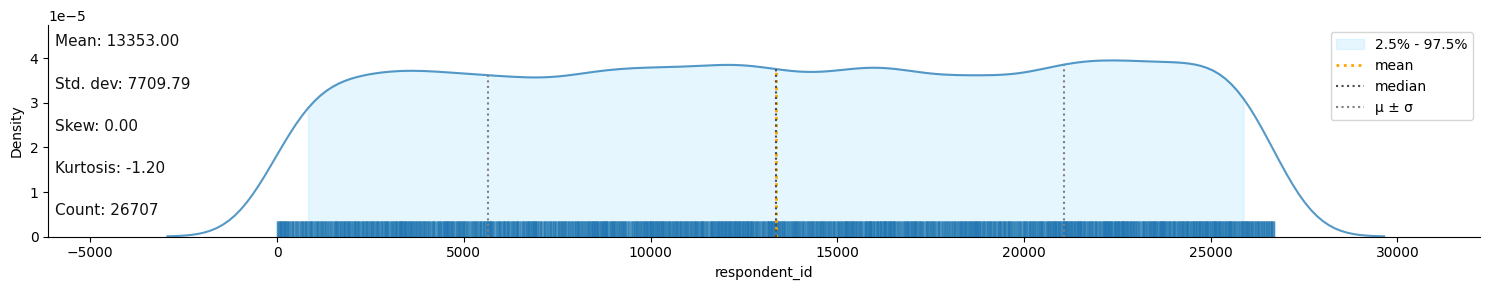

In [ ]:
klib.dist_plot(df, xlabel='')

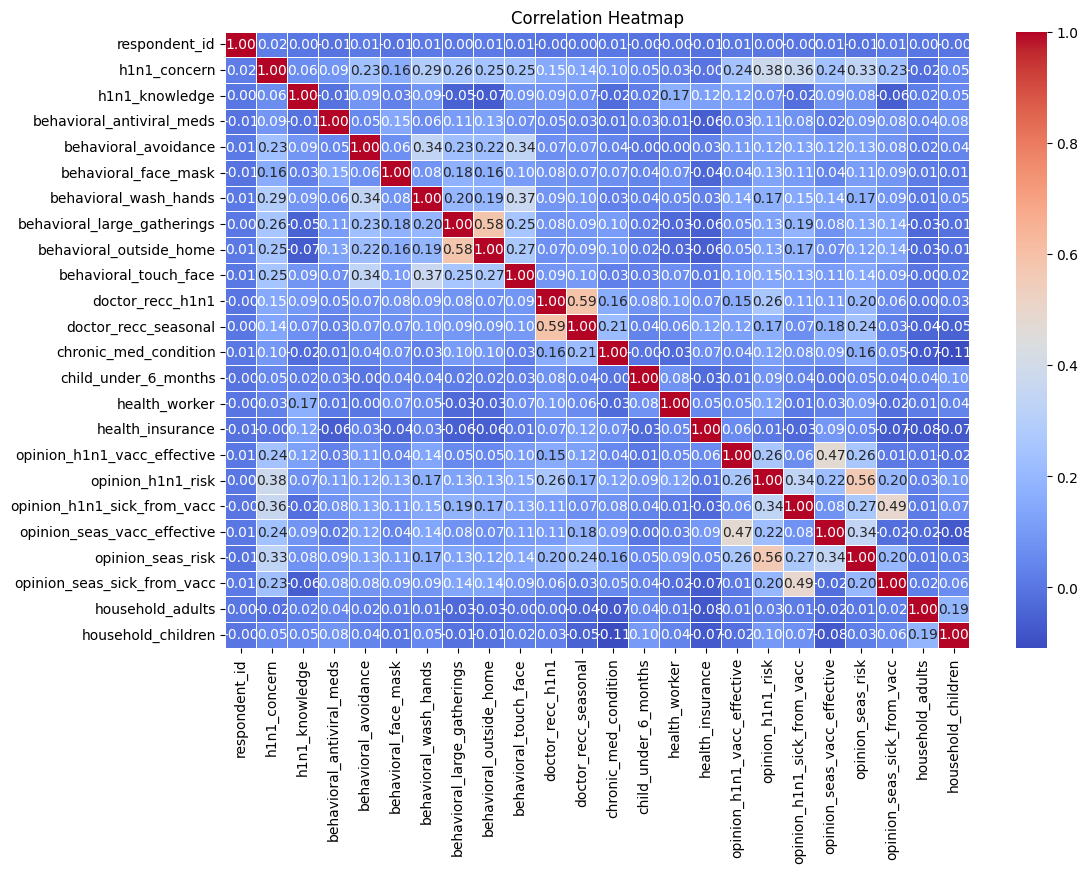

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


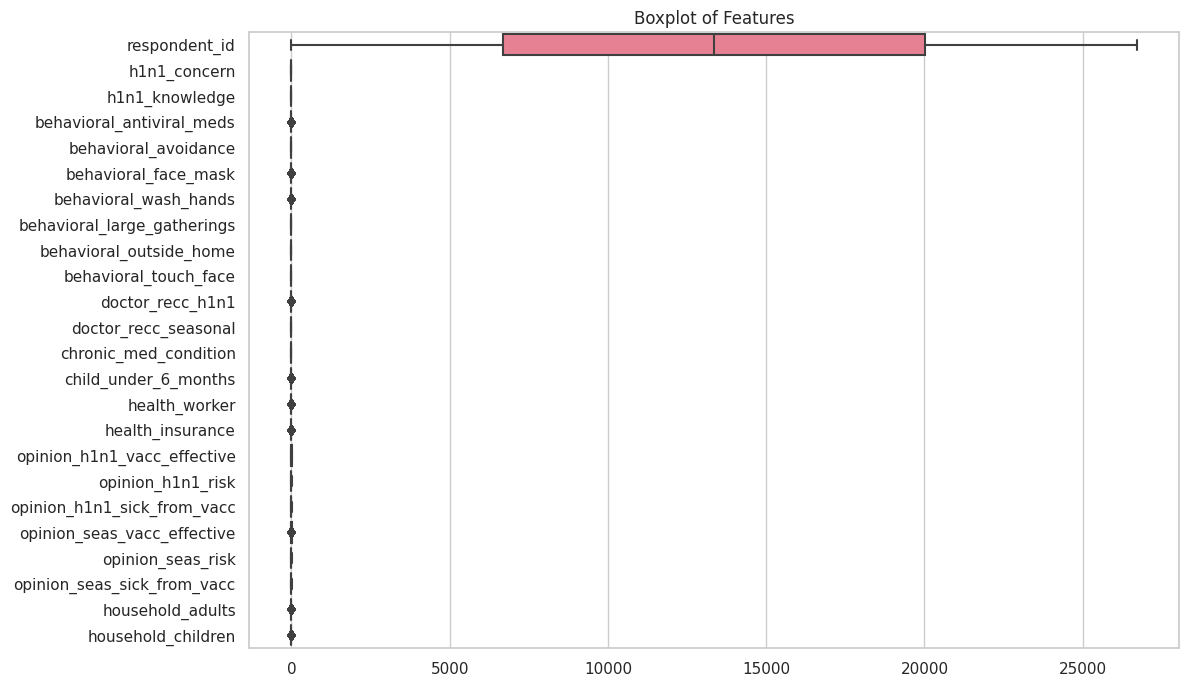

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h', palette='husl')
plt.title('Boxplot of Features')
plt.show()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from time import sleep

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Find pairs of features with high correlation (you can adjust the threshold)
high_correlation_pairs = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)
high_correlation_features = [feature for feature in high_correlation_pairs.columns if any(high_correlation_pairs[feature])]

# Check if there are high correlation pairs
if len(high_correlation_features) > 1:
    # Create subplots for high correlation pairs
    fig, axes = plt.subplots(len(high_correlation_features), len(high_correlation_features), figsize=(15, 15))

    for i, feature in enumerate(high_correlation_features):
        for j, correlated_feature in enumerate(high_correlation_features):
            if i != j:
                axes[i, j].scatter(df[feature], df[correlated_feature])
                axes[i, j].set_title(f'{feature} vs {correlated_feature}')
                axes[i, j].set_xlabel(feature)
                axes[i, j].set_ylabel(correlated_feature)

    plt.tight_layout()
    plt.show()
else:
    print("No high correlation pairs found.")

No high correlation pairs found.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
sns.set(style="ticks", color_codes=True)
pair_plot = sns.pairplot(df, markers="o")

# Customize title
plt.subplots_adjust(top=0.95)
pair_plot.fig.suptitle('Pair Plot of Features', fontsize=16)

plt.show()


KeyboardInterrupt: 

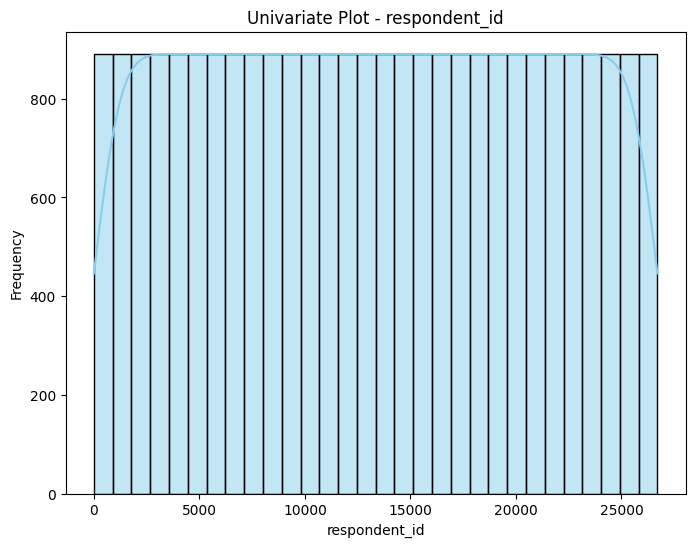

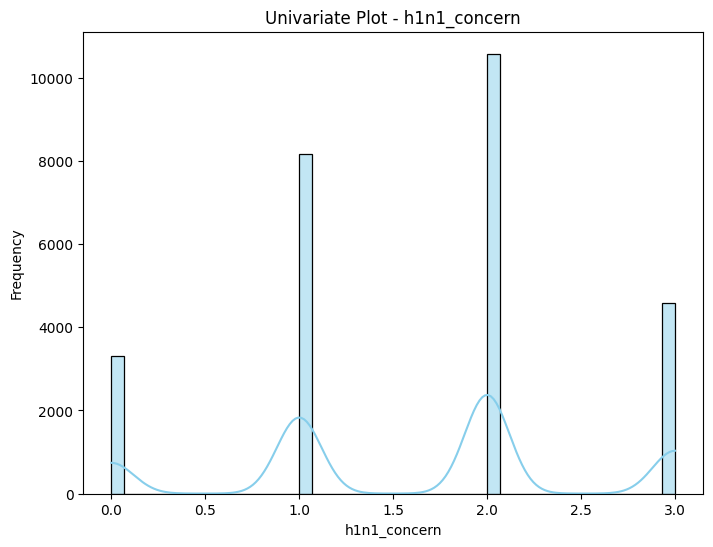

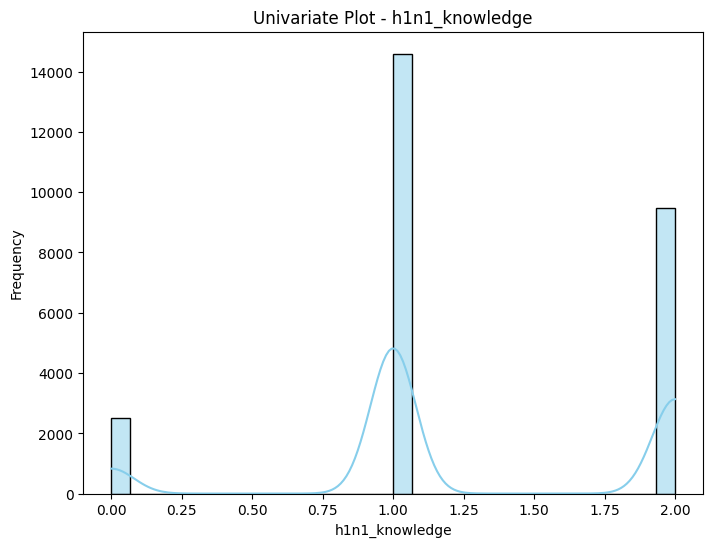

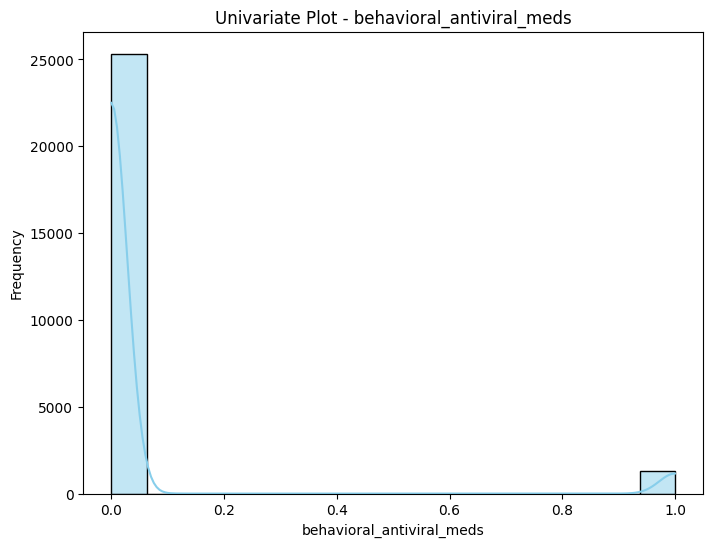

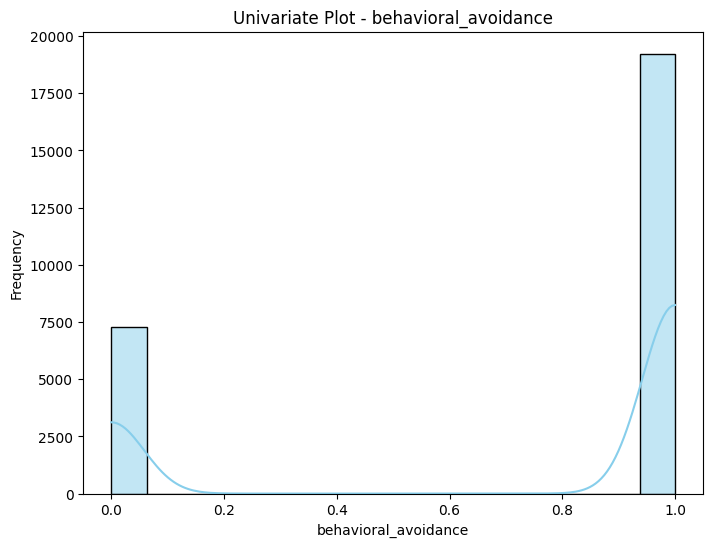

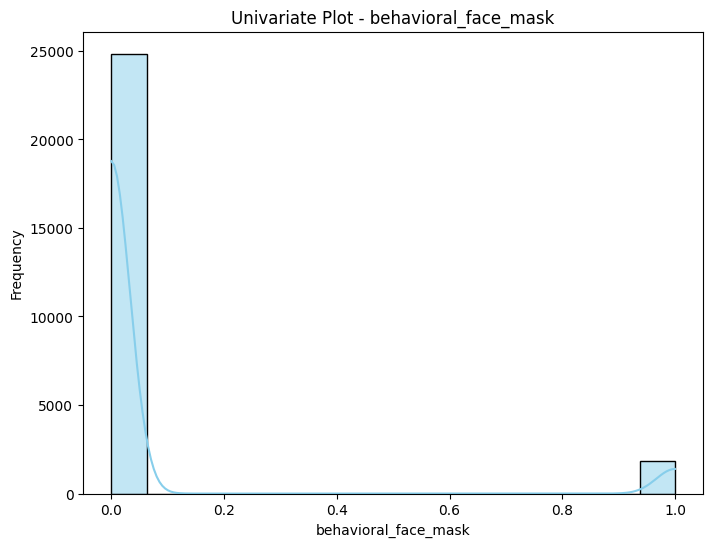

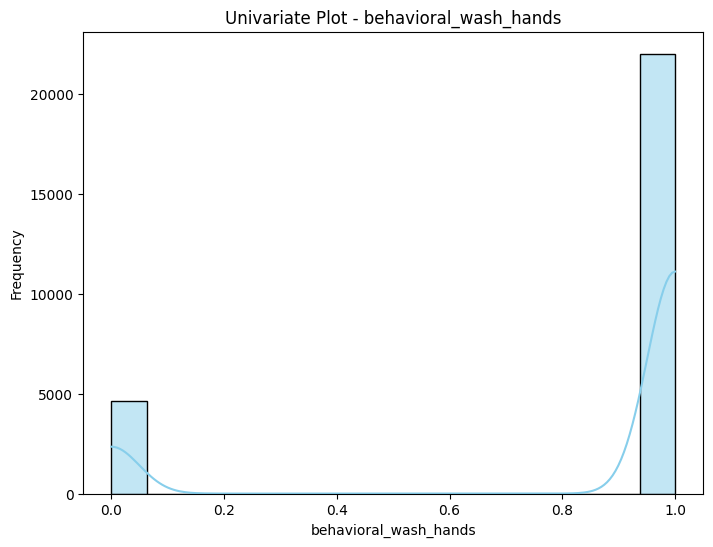

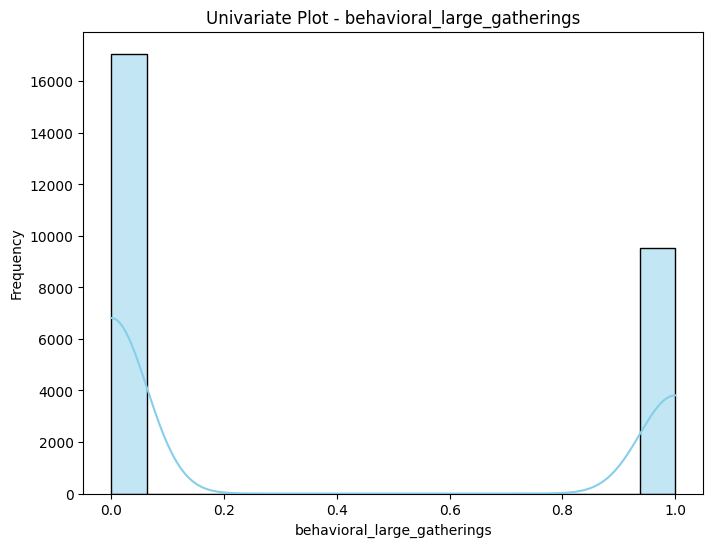

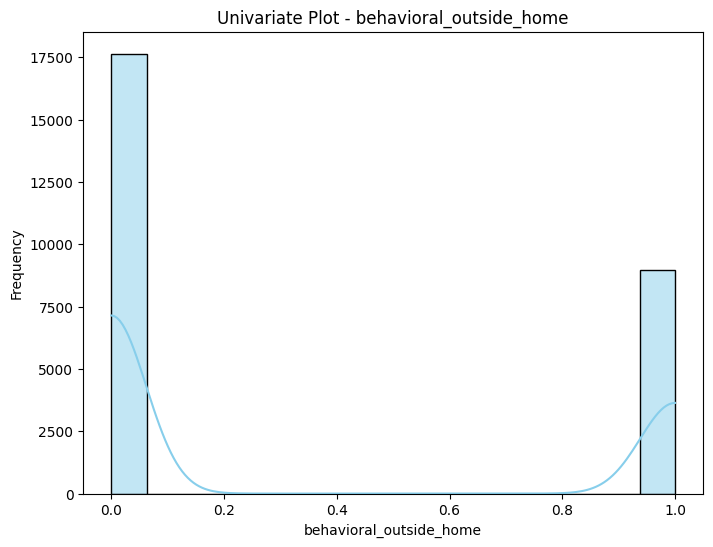

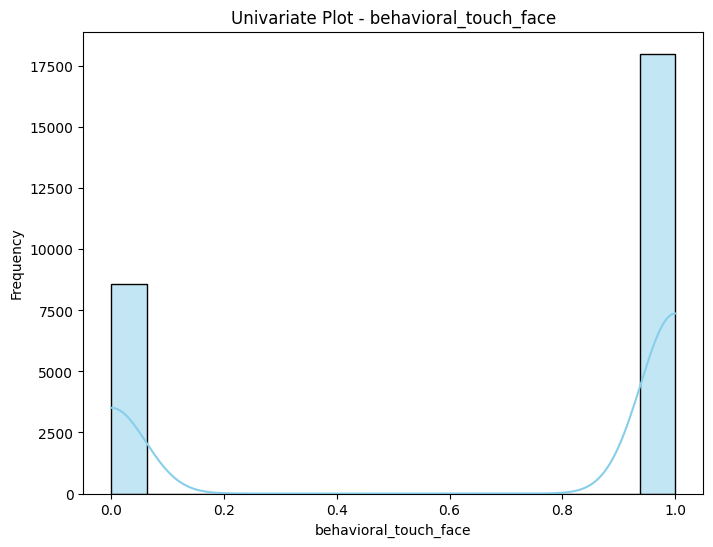

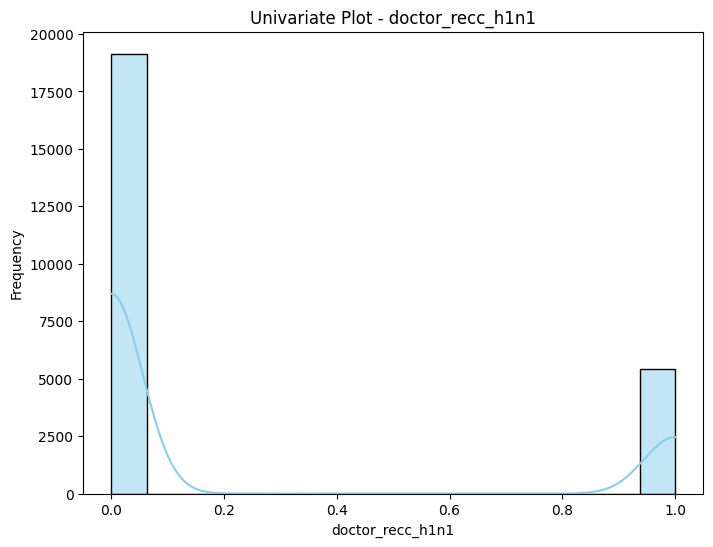

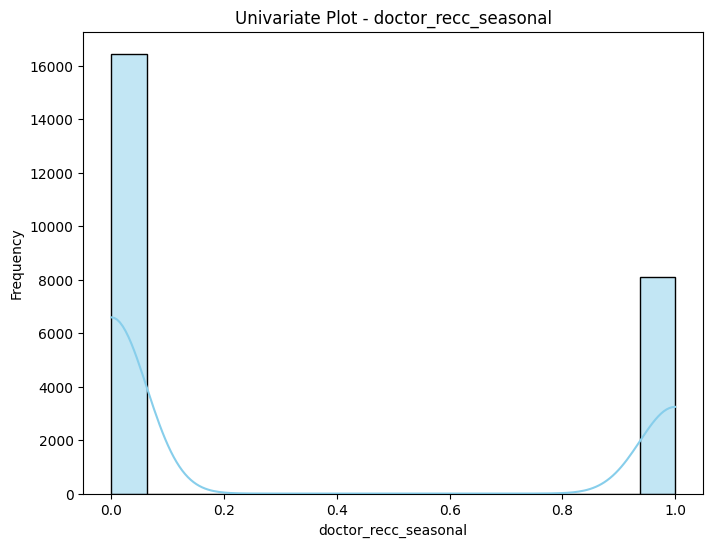

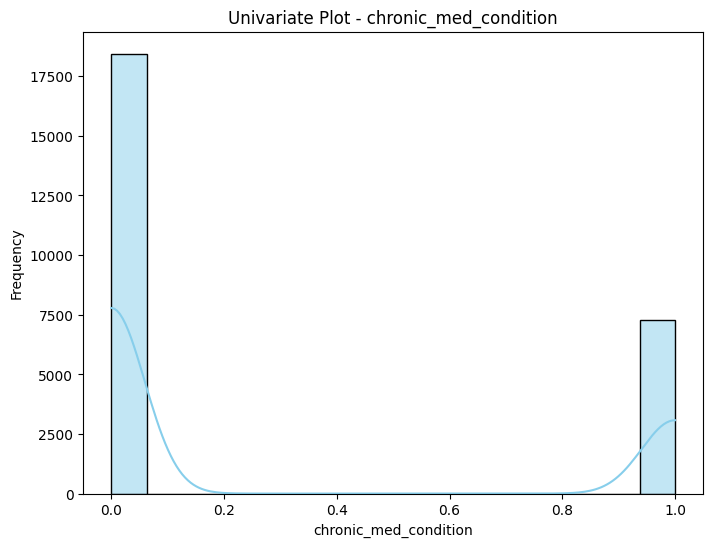

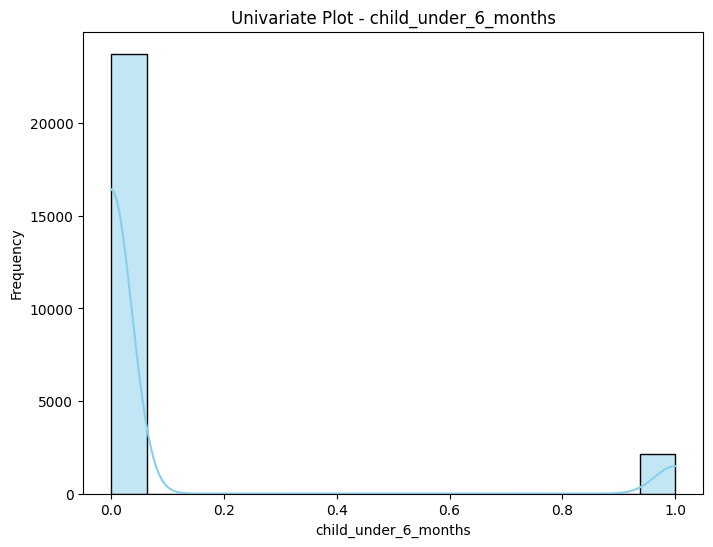

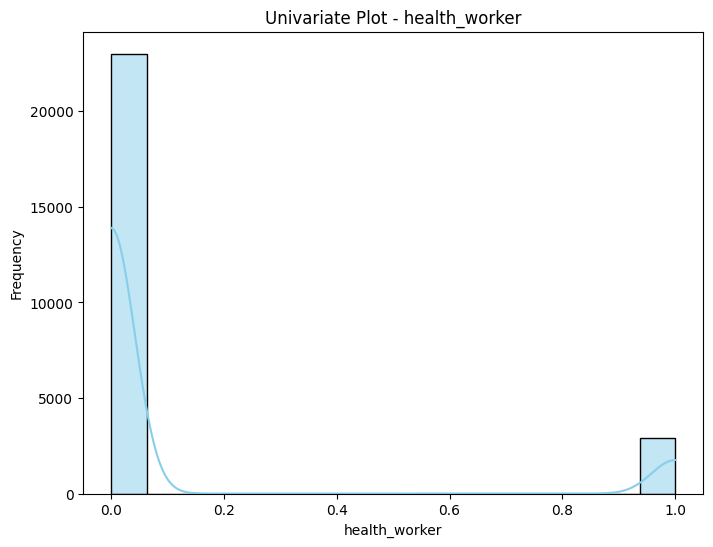

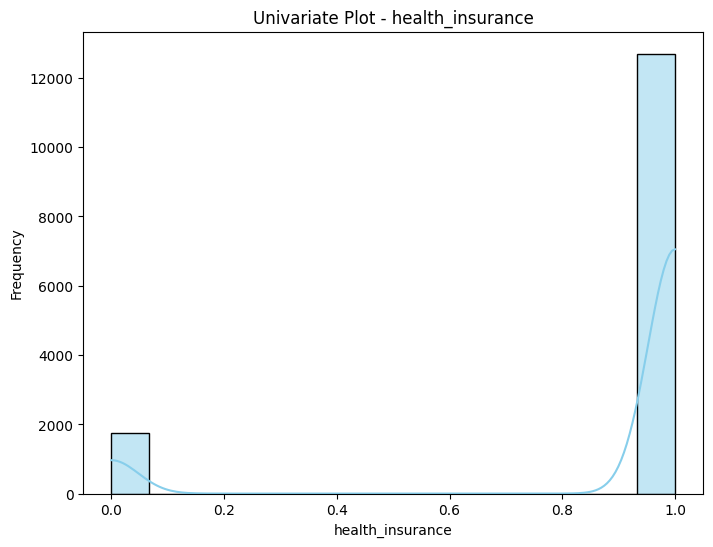

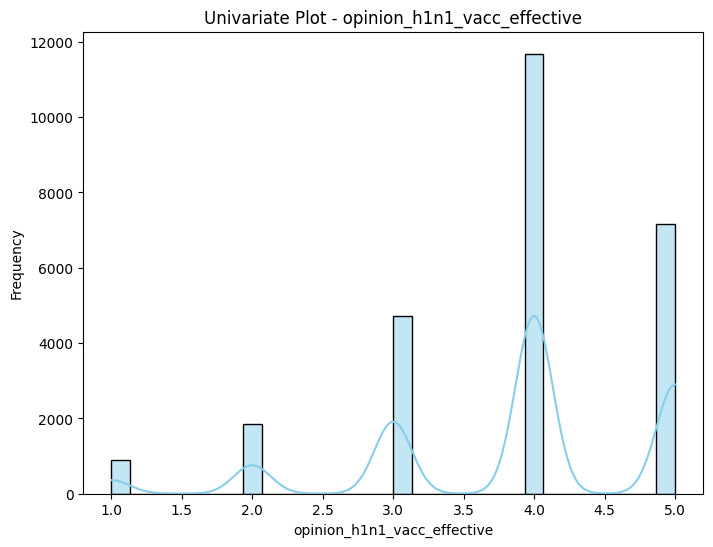

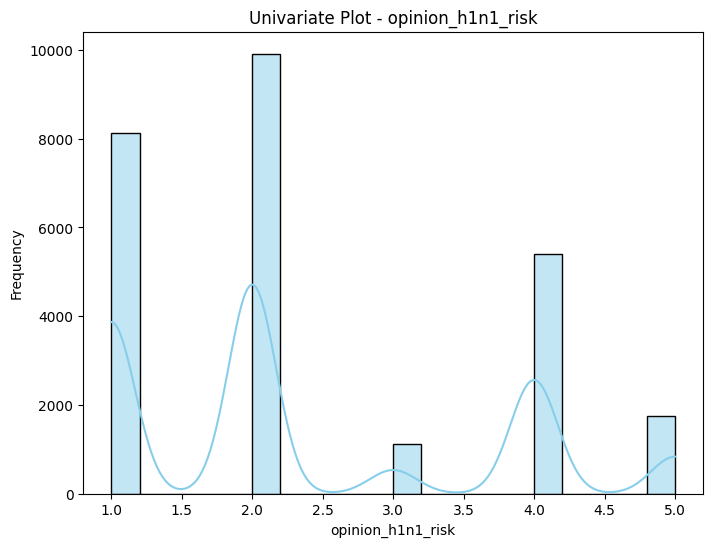

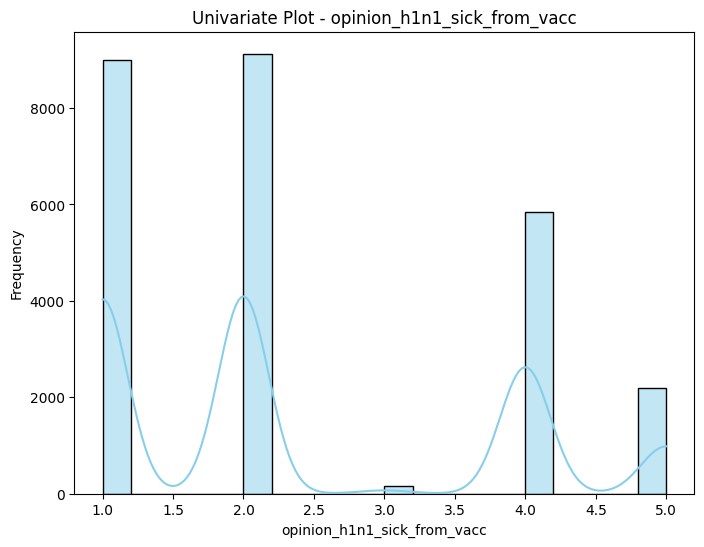

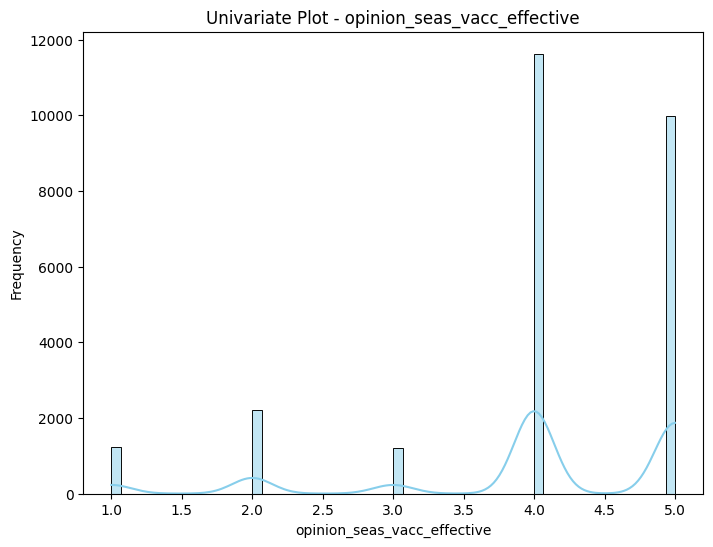

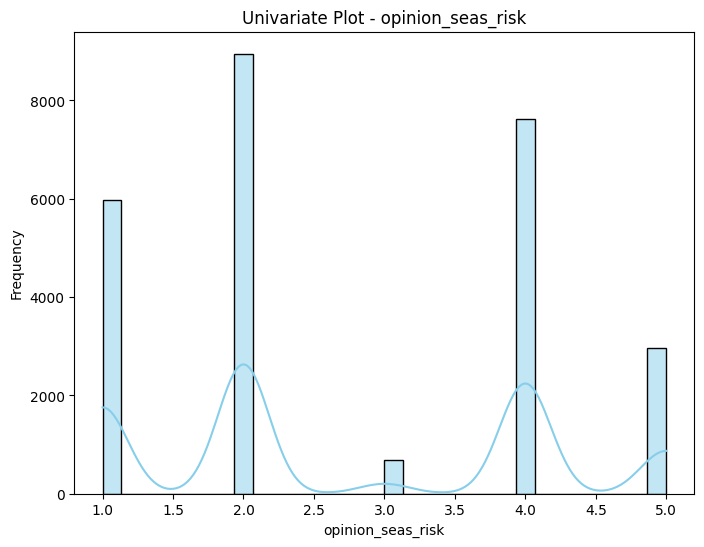

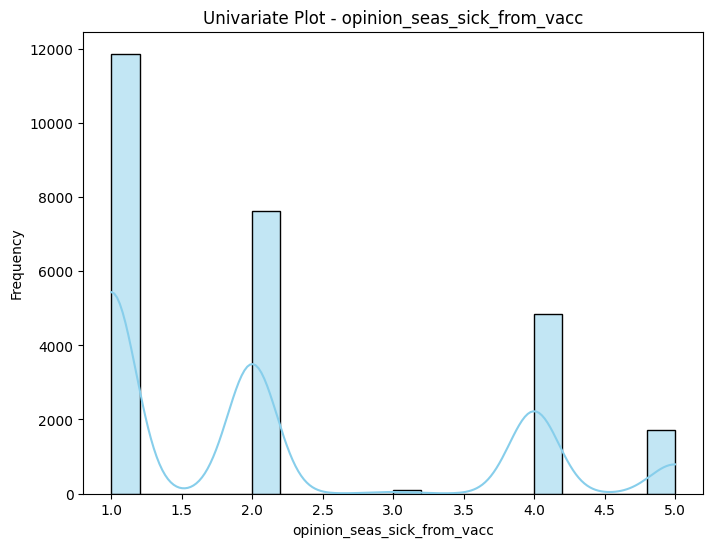

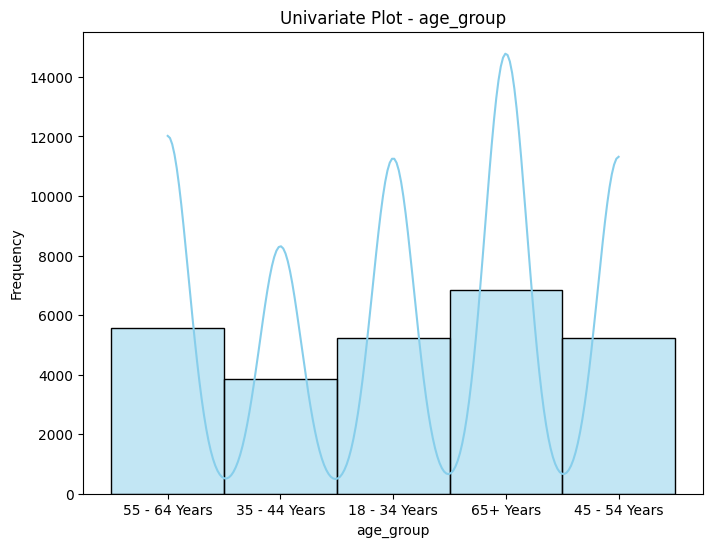

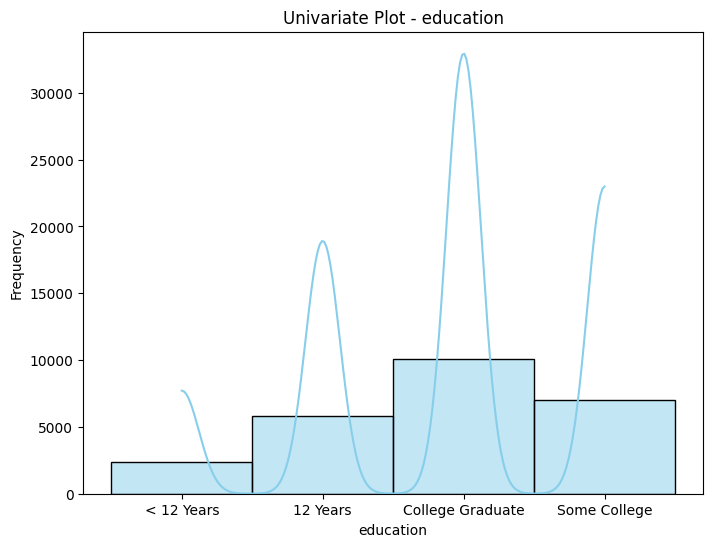

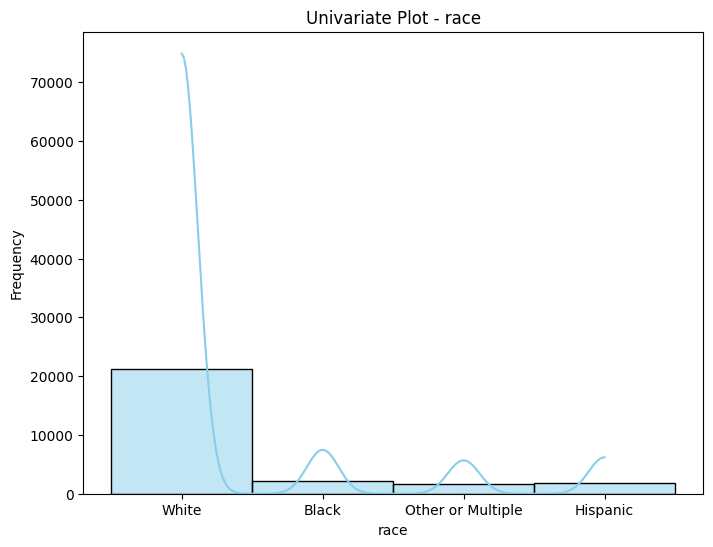

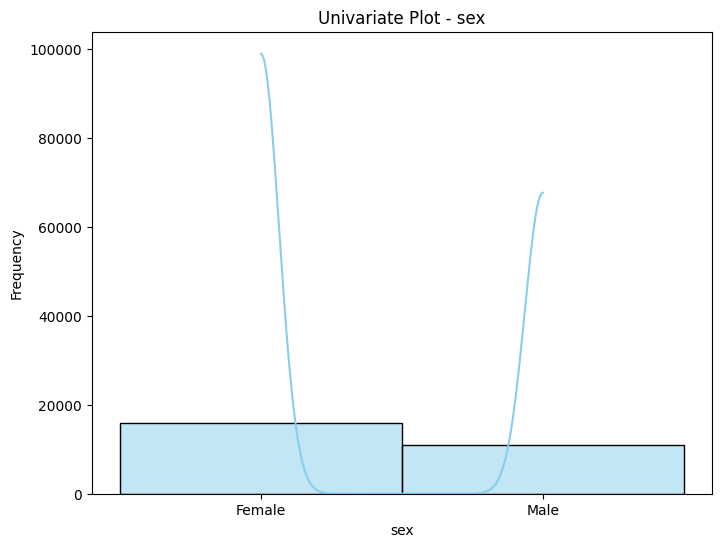

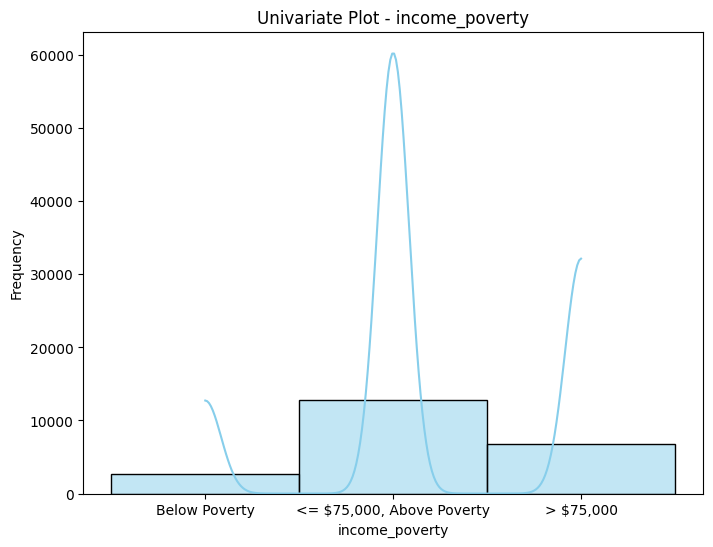

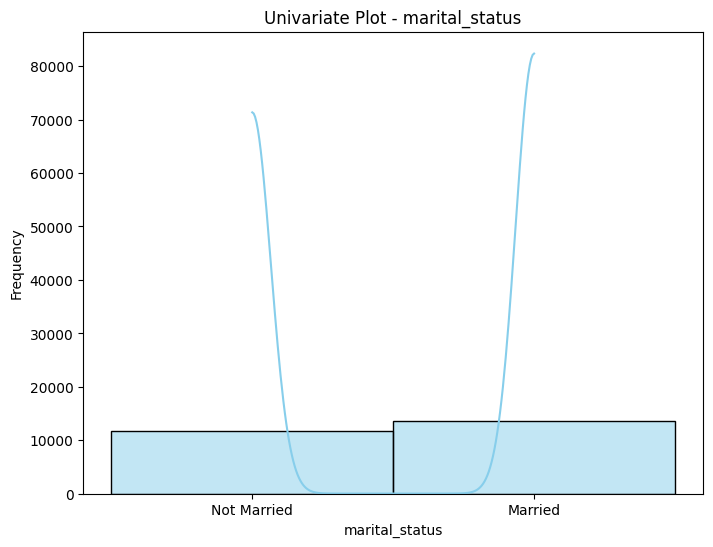

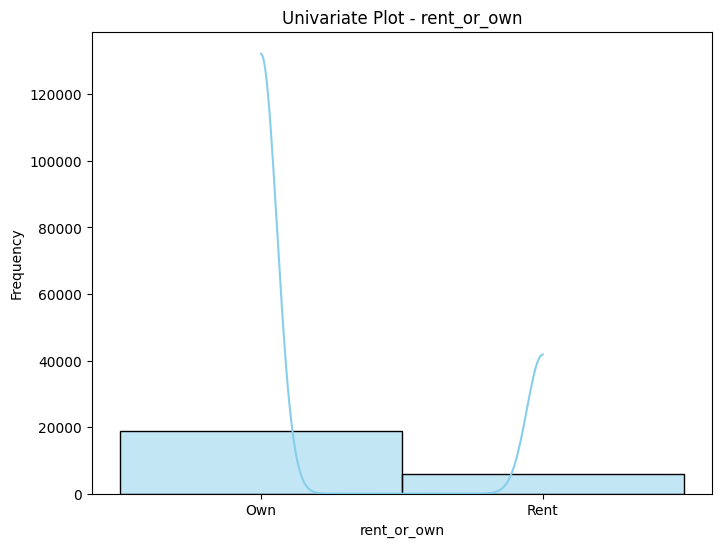

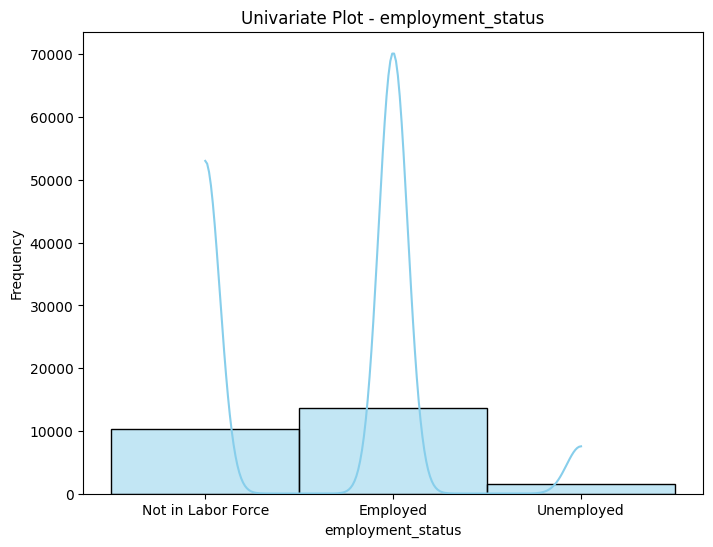

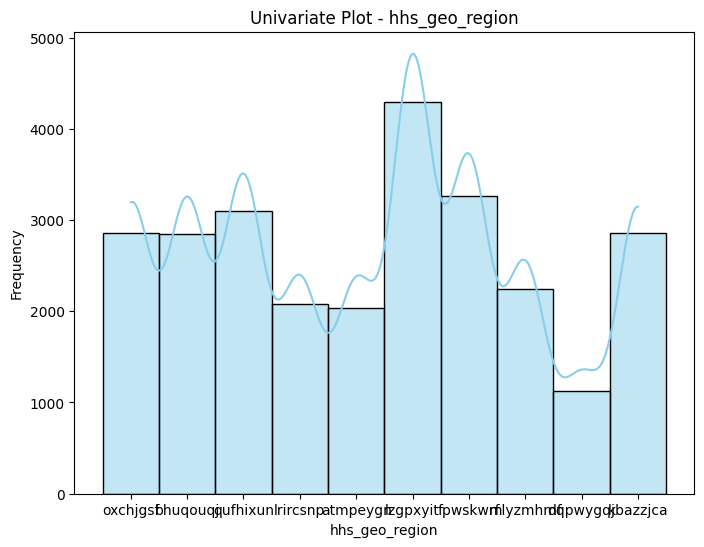

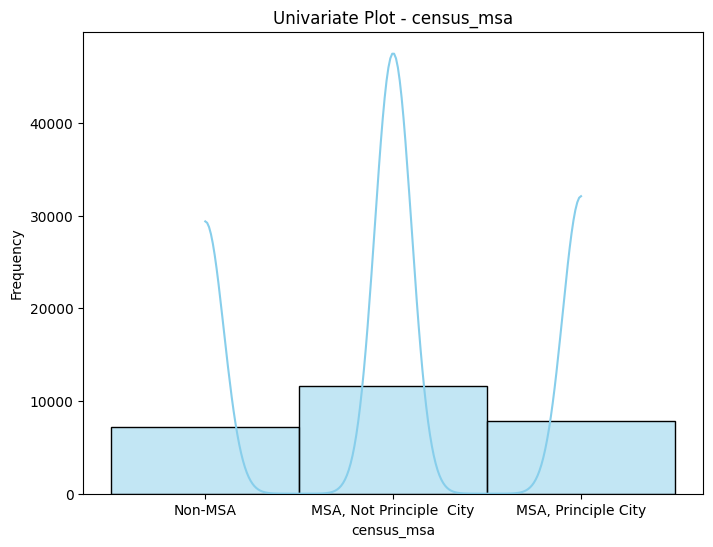

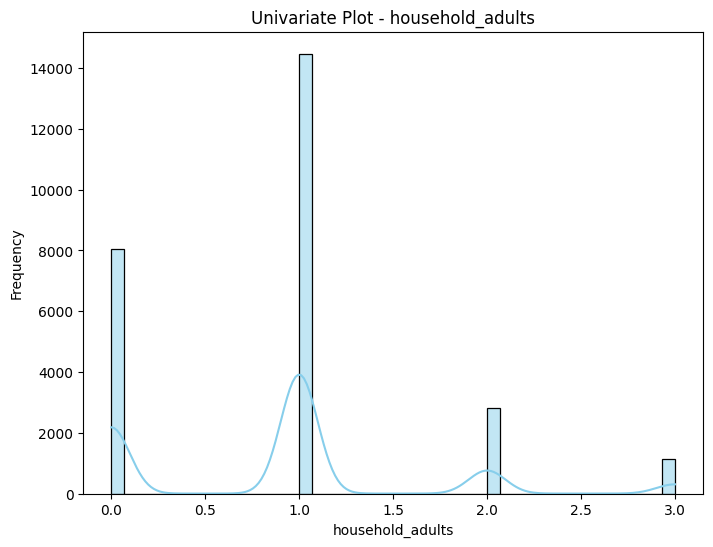

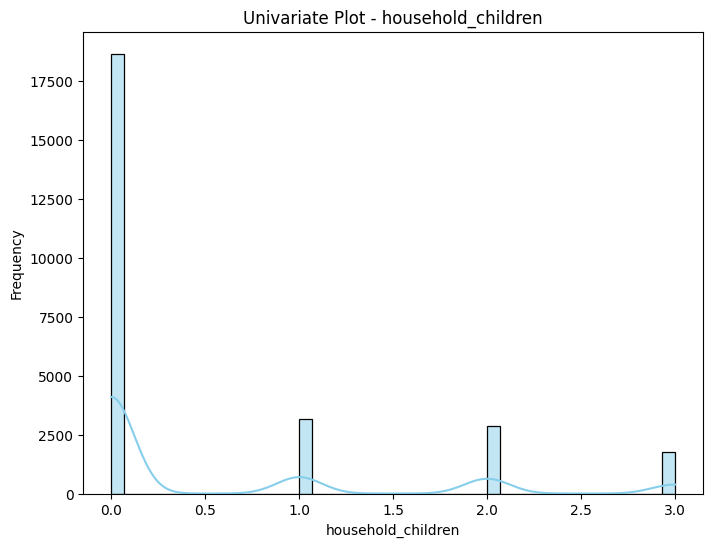

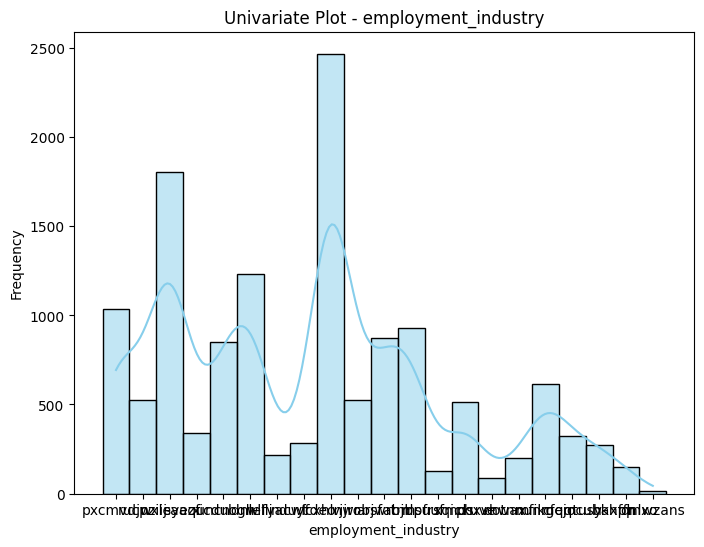

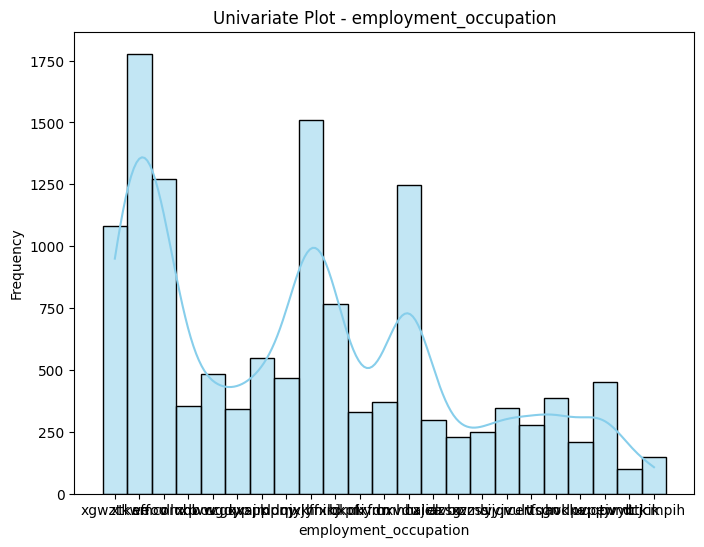

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Univariate Plots
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Univariate Plot - {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Bivariate Plots
correlation_matrix = df.corr()

# Find pairs of features with high correlation (you can adjust the threshold)
high_correlation_pairs = (correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)
high_correlation_features = [feature for feature in high_correlation_pairs.columns if any(high_correlation_pairs[feature])]

# Create scatterplots for high correlation pairs
for feature in high_correlation_features:
    correlated_features = correlation_matrix[feature][high_correlation_pairs[feature]].index.tolist()
    for correlated_feature in correlated_features:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[feature], y=df[correlated_feature])
        plt.title(f'Bivariate Scatterplot: {feature} vs {correlated_feature}')
        plt.xlabel(feature)
        plt.ylabel(correlated_feature)
        plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Bivariate Plots
correlation_threshold = 0.7
high_correlation_pairs = (correlation_matrix.abs() > correlation_threshold) & (correlation_matrix.abs() < 1.0)
high_correlation_features = [feature for feature in high_correlation_pairs.columns if any(high_correlation_pairs[feature])]

# Check if there are high correlation pairs
if high_correlation_features:
    # Create a pairplot for high correlation pairs
    pair_plot = sns.pairplot(df[high_correlation_features], diag_kind='kde', markers='o')
    pair_plot.fig.suptitle('Pair Plot of High Correlation Features', y=1.02)
    plt.show()
else:
    print("No high correlation pairs found.")





No high correlation pairs found.


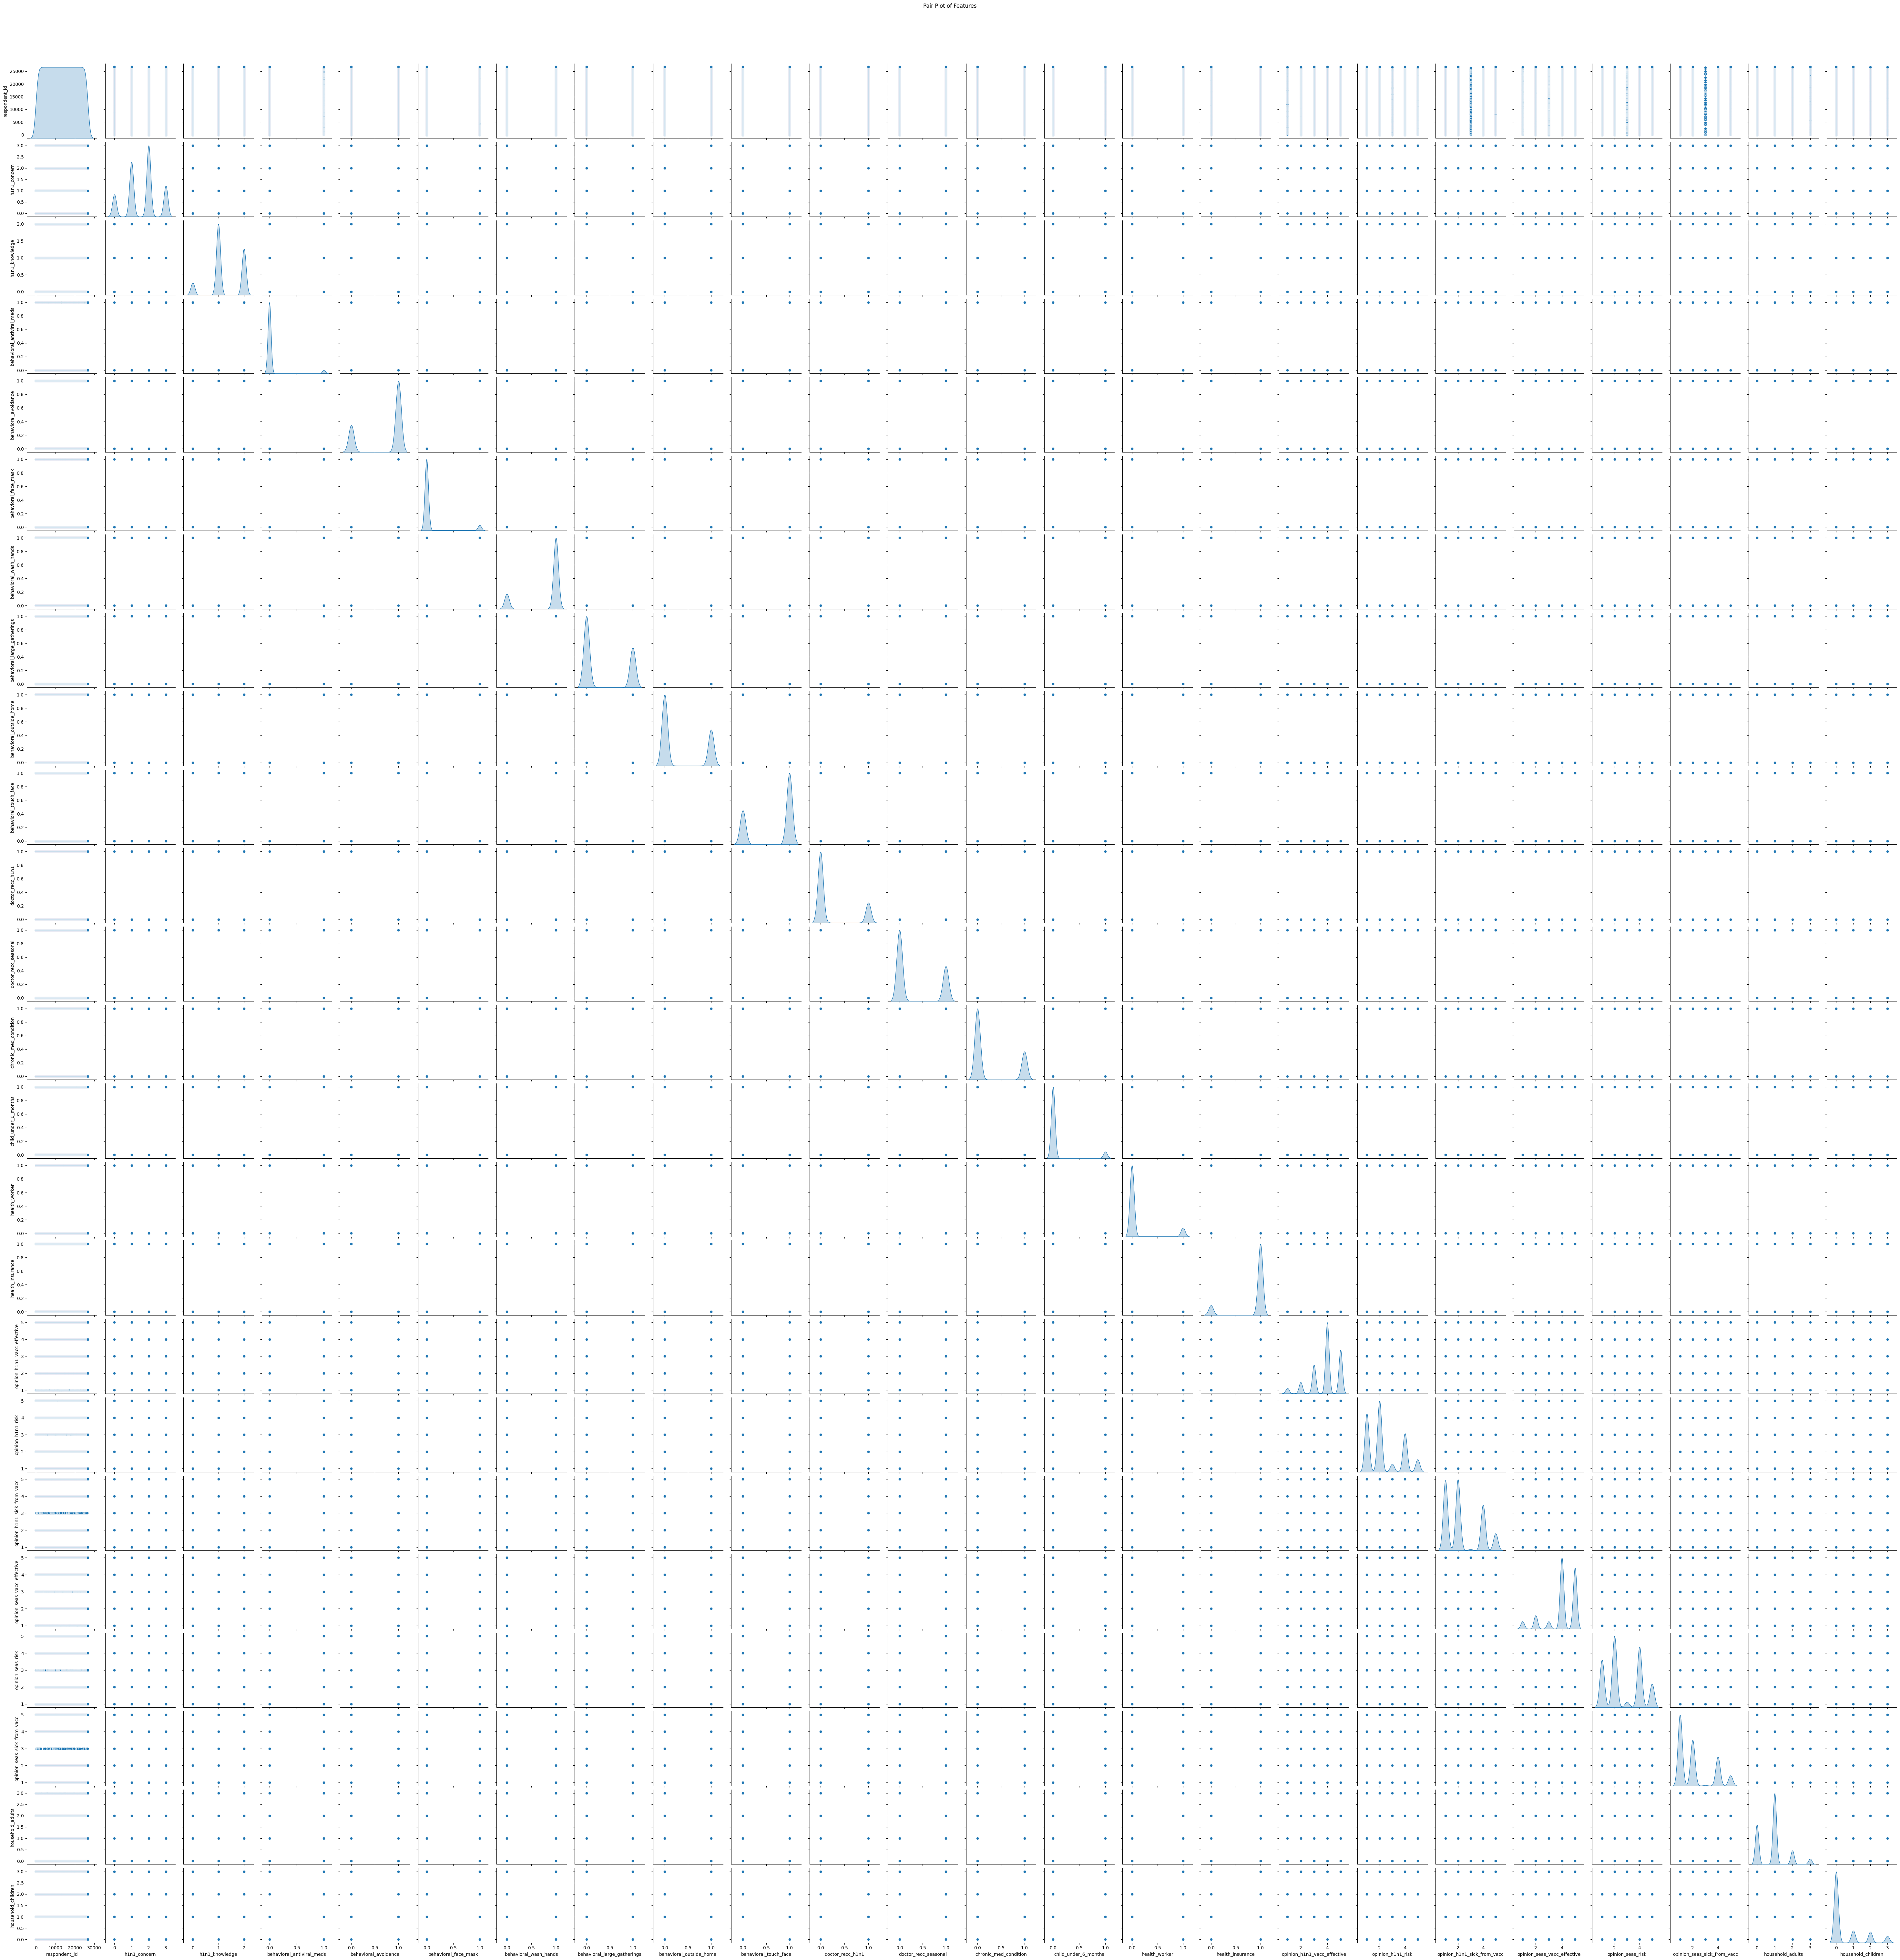

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

pair_plot = sns.pairplot(df, diag_kind='kde', markers='o')
pair_plot.fig.suptitle('Pair Plot of Features', y=1.02)
plt.show()


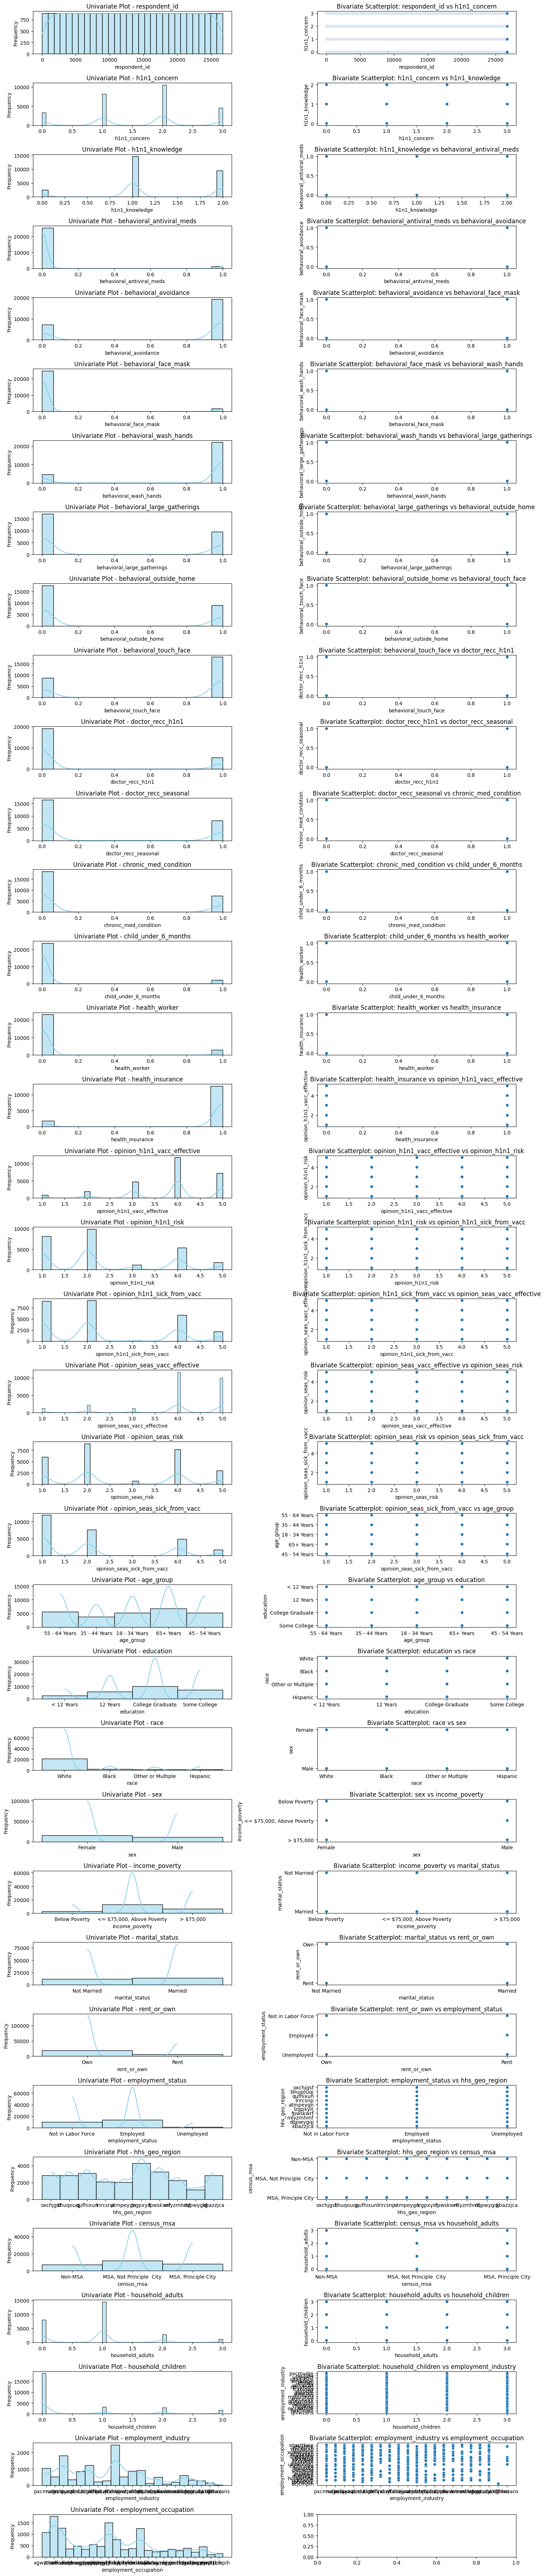

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

train = pd.read_csv('training_set_features.csv')

df = train.copy()


# Assuming 'df' is your DataFrame
correlation_matrix = df.corr()

# Univariate Plots
fig, axes = plt.subplots(nrows=len(df.columns), ncols=2, figsize=(15, 2*len(df.columns)))

for i, column in enumerate(df.columns):
    # Univariate Histogram
    sns.histplot(df[column], kde=True, color='skyblue', ax=axes[i, 0])
    axes[i, 0].set_title(f'Univariate Plot - {column}')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Bivariate Scatterplot (choose a valid bivariate relationship for illustration)
    if i < len(df.columns) - 1:  # Avoid index out of range
        sns.scatterplot(x=df[column], y=df[df.columns[i + 1]], ax=axes[i, 1])
        axes[i, 1].set_title(f'Bivariate Scatterplot: {column} vs {df.columns[i + 1]}')
        axes[i, 1].set_xlabel(column)
        axes[i, 1].set_ylabel(df.columns[i + 1])

plt.tight_layout()
plt.show()
